# COGS 108 - Final Project 

# Overview

This is my COGS 108 final project. 

In my project proposal, my question was What is the relationship between the manager's income and restaurant health inspection. However in the dataset provided, I think there are not enough relevant data to support a clear and reasonable data analysis. The 'zipcode' dataset provide family income corresponding to the zip code. The 'yelp' dataset provide restaurant price but not manager salary. 

So, after viewing the dataset provided, I will focus my research on is there a relation on the type of food the restaurant sell and the inspection status.

# Name & PID

- Name: Tianze Guan
- PID: A15556078

# Research Question

Is there a relationship between the type of foods a restaurant sell and its inspection score?

## Background and Prior Work

Generally, we can divide the restaurant into several types according to the food it sell. 

Types of restaurant:
hotdogs, sandwiches, burgers, chicken_wings, pizza, tradamerican, mexican, grocery, breakfast_brunch, coffee, chinese, italian, newamerican, delis, barssalad, seafood, bbq, bakeries, sushi.

There might be some confounding variable in this research. If two restaurant sell the same type of foods, for example, they both sell chicken wings, they may have huge difference in what type of restaurant it actually is. Some restaurant might just be fastfood restaurant that focus on the selling amount and convinience. They may also sell burgers, and other fastfoods. Example: Kentucky Fried Chicken, which is a fastfood restaurant that is relatively cheap.(Menu included in link) There also might be some restaurant that focus on the quality of chicken wings, and they may be selled with decnet steaks and wine. Example: sullivanssteakhouse,(link included) which is a expensive steakhouse and also sell chicken wings.

Not saying KFC is not healthy, but it is resonable to guess sullivanssteakhouse may get a higher inspection score. Then, it is resonable to say that the price of the restraunt can be a confounding variable.

So this project I will give every restaurant a price level from one of these three: cheap, medium, expensive, according to the price level provided in the 'Yelp' dataset.



References (include links):
- 1) https://order.kfc.com/?fulfillment=pickup&utm_source=search&utm_medium=google&utm_campaign=delivery&utm_source=google&utm_medium=cpc&utm_campaign=Branded+Core+-+Exact&utm_term=kfc&utm_content=sLqXnA3uU_pcrid_438465274982_pkw_kfc_pmt_e_pdv_c_slid__pgrid_13501550105_ptaid_kwd-300585883332_&gclid=EAIaIQobChMI5pX4_N_46QIVnB-tBh0bVAL2EAAYASAAEgLwGPD_BwE

- 2) https://sullivanssteakhouse.com/

- 3) The dataset provided by COGS 108

# Hypothesis


There is a relationship between the type of food a restaurant sell and its inspection score.

# Dataset(s)

a)
- Dataset Name: df_yelp
- Link to the dataset: 'yelp.csv'
- Number of observations: 3688

This dataset contains information about the restaurant's information, like name, location, taing on yelp, and food type provided.

b)
- Dataset Name: df_inspection
- Link to the dataset: 'inspection.csv'
- Number of observations: 18466

This dataset include restaurants' information and inspection status over years, including its name, location, inspection score, and critical issue, etc.

How to combine these two dataset:
We can combine these two dataset by restaurant name, since they both include restaurant name as a column.

# Setup

In [1]:
# This cell is for import tools we need for the project
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataframe from excel file
df_yelp = pd.read_csv('yelp.csv')
df_inspection = pd.read_csv('inspections.csv')

In [3]:
# Examine df read in
df_yelp.head()

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df_inspection.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df_yelp.shape

(3688, 31)

In [6]:
df_inspection.shape

(18466, 36)

# Data Cleaning

First we want to clean the df_inspection dataframe, combining multiple inspection scores into one inspection score by taking their mean.

In [7]:
df_inspection = df_inspection[['name','x','y','score']]

In [8]:
df_inspection.head()

,name,x,y,score
0,Cafe 3000 At Wake Med,-78.587963,35.783914,96.0
1,Overtime Sports Pub,-78.549673,35.791986,98.0
2,TASTE OF CHINA,-78.547960,35.723125,97.0
3,Panera Bread #1643,-78.815727,35.799249,99.0
4,WalMart Supercenter #4499-00 Deli/Bakery,-78.296347,35.831285,97.0


In [9]:
df_yelp = df_yelp.drop(['id', 'is_closed', 'rating', 'review_count', 'address1', 'zip_code', 'name', \
                        'phone'], axis=1)

In [10]:
df_yelp

,latitude,longitude,price,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,grocery,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,35.873808,-78.790896,$$,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,35.802840,-78.785930,$,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,35.839681,-78.678791,$,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,35.743170,-77.964160,$$,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,35.762936,-77.999428,$,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,35.801217,-78.719568,19198344000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3684,35.791430,-78.668820,19198213111,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3685,36.020901,-78.914003,19194250800,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3686,35.557201,-78.807747,19195526154,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df_yelp.shape

(3688, 23)

In [12]:
# Take average inspection score over years as the restaurant's inspextion score
aggregation_functions = {'score': 'mean', 'x': 'first', 'y': 'first'}
df_inspection = df_inspection.groupby(df_inspection['name'], as_index=False).aggregate(aggregation_functions)

In [13]:
df_yelp = df_yelp.rename(columns={"latitude": "y", "longitude": "x"})

In [14]:
# lower the percision of x and y to make them more recognizable
df_yelp['x'] = list(np.around(np.array(df_yelp['x']),4))
df_yelp['y'] = list(np.around(np.array(df_yelp['y']),4))
df_inspection['x'] = list(np.around(np.array(df_inspection['x']),4))
df_inspection['y'] = list(np.around(np.array(df_inspection['y']),4))

In [15]:
df_inspection

,name,score,x,y
0,#1 CHINA,96.500000,-78.8628,35.7380
1,#1 CHINA WOK,93.250000,-78.4952,35.9673
2,115 Midtowne,93.916667,-78.6426,35.8399
3,1250 Heritage,95.500000,-78.4967,35.9497
4,1705 Prime Catering and Events,97.636364,-78.6061,35.8507
...,...,...,...,...
2903,Zebulon Middle School Cafeteria,98.000000,-78.3118,35.8315
2904,"Zest, Inc",98.833333,-78.6519,35.9001
2905,Zoes Kitchen,96.000000,-78.6584,35.7978
2906,brb,97.916667,-78.6378,35.7708


In [16]:
df_inspection.shape

(2908, 4)

In [17]:
# Combine two dataframe according to the restaurant name 
df = pd.merge(df_inspection, df_yelp, on=['x', 'y'])

In [20]:
# clean the dataset with nan
df = df.dropna()

In [21]:
df

,name,score,x,y,price,hotdogs,sandwiches,pizza,tradamerican,burgers,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,214 MARTIN STREET,96.583333,-78.6360,35.7765,$,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 AMIGO'S,96.000000,-78.7956,35.7060,$$,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,PAPA MURPHY'S NC046,97.250000,-78.7956,35.7060,$$,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,AGGIE'S GRILL STATION,95.166667,-78.5915,35.8221,$,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,AJ'S FOOD MART,93.250000,-78.7367,35.6767,19197793900,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,ZAXBY's,94.714286,-78.7767,35.5924,$,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1100,ZAXBY`S,95.916667,-78.6575,35.9032,$,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1101,Zaxby`s Restaurant,96.166667,-78.6528,35.7236,$,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1102,Zaxby`s of Knightdale,96.666667,-78.5040,35.7966,$,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


# Data Analysis & Results

To represent the inspection score of a type of restaurant, we can calculate the mean of all restaurant that sell a certain type of food.

First we analysis the $ peice level, start with the hotdog restaurant.

In [46]:
df_hotdog_cheap = df[df['price'] == '$']
df_hotdog_cheap = df_hotdog_cheap[df_hotdog_cheap['hotdogs'] == True]

df_hotdog_medium = df[df['price'] == '$$']
df_hotdog_medium = df_hotdog_medium[df_hotdog_medium['hotdogs'] == True]

df_hotdog_expensive = df[df['price'] == '$$$']
df_hotdog_expensive = df_hotdog_expensive[df_hotdog_expensive['hotdogs'] == True]


In [47]:
score_hotdog_cheap = df_hotdog_cheap['score'].mean()
score_hotdog_medium = df_hotdog_medium['score'].mean()
score_hotdog_expensive = df_hotdog_expensive['score'].mean()

In [48]:
print(score_hotdog_cheap)
print(score_hotdog_medium)
print(score_hotdog_expensive)

96.1704251530782
96.17142857142858
nan


Hotdog restaurants:

cheap inspection score average: 96.1704251530782

medium inspection score average: 96.17142857142858

expensive inspection score average: nan

Then we do the sandwiches analysis:

In [55]:
df_sandwiches_cheap = df[df['price'] == '$']
df_sandwiches_cheap = df_sandwiches_cheap[df_sandwiches_cheap['sandwiches'] == True]

df_sandwiches_medium = df[df['price'] == '$$']
df_sandwiches_medium = df_sandwiches_medium[df_sandwiches_medium['sandwiches'] == True]

df_sandwiches_expensive = df[df['price'] == '$$$']
df_sandwiches_expensive = df_sandwiches_expensive[df_sandwiches_expensive['sandwiches'] == True]

score_sandwiches_cheap = df_sandwiches_cheap['score'].mean()
score_sandwiches_medium = df_sandwiches_medium['score'].mean()
score_sandwiches_expensive = df_sandwiches_expensive['score'].mean()

print(score_sandwiches_cheap)
print(score_sandwiches_medium)
print(score_sandwiches_expensive)

96.14700111269805
95.75394772851669
nan


sandwiches restaurants: 

cheap inspection score average: 96.14700111269805

medium inspection score average: 95.75394772851669

expensive inspection score average: nan
    
Then we do the pizza analysis:

In [56]:
df_pizza_cheap = df[df['price'] == '$']
df_pizza_cheap = df_pizza_cheap[df_pizza_cheap['pizza'] == True]

df_pizza_medium = df[df['price'] == '$$']
df_pizza_medium = df_pizza_medium[df_pizza_medium['pizza'] == True]

df_pizza_expensive = df[df['price'] == '$$$']
df_pizza_expensive = df_pizza_expensive[df_pizza_expensive['pizza'] == True]

score_pizza_cheap = df_pizza_cheap['score'].mean()
score_pizza_medium = df_pizza_medium['score'].mean()
score_pizza_expensive = df_pizza_expensive['score'].mean()

print(score_pizza_cheap)
print(score_pizza_medium)
print(score_pizza_expensive)

96.29947077154522
95.13885963920575
nan


pizza restaurants: 

cheap inspection score average: 96.29947077154522

medium inspection score average: 95.13885963920575

expensive inspection score average: nan

Then we do the tradamerican analysis:

In [57]:
df_tradamerican_cheap = df[df['price'] == '$']
df_tradamerican_cheap = df_tradamerican_cheap[df_tradamerican_cheap['tradamerican'] == True]

df_tradamerican_medium = df[df['price'] == '$$']
df_tradamerican_medium = df_tradamerican_medium[df_tradamerican_medium['tradamerican'] == True]

df_tradamerican_expensive = df[df['price'] == '$$$']
df_tradamerican_expensive = df_tradamerican_expensive[df_tradamerican_expensive['tradamerican'] == True]

score_tradamerican_cheap = df_tradamerican_cheap['score'].mean()
score_tradamerican_medium = df_tradamerican_medium['score'].mean()
score_tradamerican_expensive = df_tradamerican_expensive['score'].mean()

print(score_tradamerican_cheap)
print(score_tradamerican_medium)
print(score_tradamerican_expensive)

95.76815515402471
95.15403034465534
97.0


tradamerican restaurants:

cheap inspection score average: 95.76815515402471

medium inspection score average: 95.15403034465534

expensive inspection score average: 97.0

Then we do the burgers analysis:

In [59]:
df_burgers_cheap = df[df['price'] == '$']
df_burgers_cheap = df_burgers_cheap[df_burgers_cheap['burgers'] == True]

df_burgers_medium = df[df['price'] == '$$']
df_burgers_medium = df_burgers_medium[df_burgers_medium['burgers'] == True]

df_burgers_expensive = df[df['price'] == '$$$']
df_burgers_expensive = df_burgers_expensive[df_burgers_expensive['burgers'] == True]

score_burgers_cheap = df_burgers_cheap['score'].mean()
score_burgers_medium = df_burgers_medium['score'].mean()
score_burgers_expensive = df_burgers_expensive['score'].mean()

print(score_burgers_cheap)
print(score_burgers_medium)
print(score_burgers_expensive)

96.34195105820105
94.88308823529412
nan


burgers restaurants:

cheap inspection score average: 96.34195105820105

medium inspection score average: 94.88308823529412

expensive inspection score average: nan

Then we do the mexican analysis:

In [60]:
df_mexican_cheap = df[df['price'] == '$']
df_mexican_cheap = df_mexican_cheap[df_mexican_cheap['mexican'] == True]

df_mexican_medium = df[df['price'] == '$$']
df_mexican_medium = df_mexican_medium[df_mexican_medium['mexican'] == True]

df_mexican_expensive = df[df['price'] == '$$$']
df_mexican_expensive = df_mexican_expensive[df_mexican_expensive['mexican'] == True]

score_mexican_cheap = df_mexican_cheap['score'].mean()
score_mexican_medium = df_mexican_medium['score'].mean()
score_mexican_expensive = df_mexican_expensive['score'].mean()

print(score_mexican_cheap)
print(score_mexican_medium)
print(score_mexican_expensive)

95.58874806501548
95.82052833232507
nan


mexican restaurants:

cheap inspection score average: 95.58874806501548

medium inspection score average: 95.82052833232507

expensive inspection score average: nan

Then we do the grocery analysis:

In [61]:
df_grocery_cheap = df[df['price'] == '$']
df_grocery_cheap = df_grocery_cheap[df_grocery_cheap['grocery'] == True]

df_grocery_medium = df[df['price'] == '$$']
df_grocery_medium = df_grocery_medium[df_grocery_medium['grocery'] == True]

df_grocery_expensive = df[df['price'] == '$$$']
df_grocery_expensive = df_grocery_expensive[df_grocery_expensive['grocery'] == True]

score_grocery_cheap = df_grocery_cheap['score'].mean()
score_grocery_medium = df_grocery_medium['score'].mean()
score_grocery_expensive = df_grocery_expensive['score'].mean()

print(score_grocery_cheap)
print(score_grocery_medium)
print(score_grocery_expensive)

95.40505802068303
96.4806150793651
96.05661128087598


grocery restaurants:

cheap inspection score average: 95.40505802068303

medium inspection score average: 96.4806150793651

expensive inspection score average: 96.05661128087598

Then we do the breakfast_brunch analysis:

In [62]:
df_breakfast_brunch_cheap = df[df['price'] == '$']
df_breakfast_brunch_cheap = df_breakfast_brunch_cheap[df_breakfast_brunch_cheap['breakfast_brunch'] == True]

df_breakfast_brunch_medium = df[df['price'] == '$$']
df_breakfast_brunch_medium = df_breakfast_brunch_medium[df_breakfast_brunch_medium['breakfast_brunch'] == True]

df_breakfast_brunch_expensive = df[df['price'] == '$$$']
df_breakfast_brunch_expensive = df_breakfast_brunch_expensive[df_breakfast_brunch_expensive['breakfast_brunch'] == True]

score_breakfast_brunch_cheap = df_breakfast_brunch_cheap['score'].mean()
score_breakfast_brunch_medium = df_breakfast_brunch_medium['score'].mean()
score_breakfast_brunch_expensive = df_breakfast_brunch_expensive['score'].mean()

print(score_breakfast_brunch_cheap)
print(score_breakfast_brunch_medium)
print(score_breakfast_brunch_expensive)

95.68778827951195
95.17986772486773
96.35714285714286


breakfast_brunch restaurants:

cheap inspection score average: 95.68778827951195

medium inspection score average: 95.17986772486773

expensive inspection score average: 96.35714285714286

Then we do the coffee analysis:

In [63]:
df_coffee_cheap = df[df['price'] == '$']
df_coffee_cheap = df_coffee_cheap[df_coffee_cheap['coffee'] == True]

df_coffee_medium = df[df['price'] == '$$']
df_coffee_medium = df_coffee_medium[df_coffee_medium['coffee'] == True]

df_coffee_expensive = df[df['price'] == '$$$']
df_coffee_expensive = df_coffee_expensive[df_coffee_expensive['coffee'] == True]

score_coffee_cheap = df_coffee_cheap['score'].mean()
score_coffee_medium = df_coffee_medium['score'].mean()
score_coffee_expensive = df_coffee_expensive['score'].mean()

print(score_coffee_cheap)
print(score_coffee_medium)
print(score_coffee_expensive)

96.55313076139548
96.53665407107512
nan


coffee restaurants:

cheap inspection score average: 96.55313076139548

medium inspection score average: 96.53665407107512

expensive inspection score average: nan

Then we do the chinese analysis:

In [64]:
df_chinese_cheap = df[df['price'] == '$']
df_chinese_cheap = df_chinese_cheap[df_chinese_cheap['chinese'] == True]

df_chinese_medium = df[df['price'] == '$$']
df_chinese_medium = df_chinese_medium[df_chinese_medium['chinese'] == True]

df_chinese_expensive = df[df['price'] == '$$$']
df_chinese_expensive = df_chinese_expensive[df_chinese_expensive['chinese'] == True]

score_chinese_cheap = df_chinese_cheap['score'].mean()
score_chinese_medium = df_chinese_medium['score'].mean()
score_chinese_expensive = df_chinese_expensive['score'].mean()

print(score_chinese_cheap)
print(score_chinese_medium)
print(score_chinese_expensive)

96.62793452579166
93.78133116883117
nan


chinese restaurants:

cheap inspection score average: 96.62793452579166

medium inspection score average: 93.78133116883117

expensive inspection score average: nan

Then we do the italian analysis:

In [66]:
df_italian_cheap = df[df['price'] == '$']
df_italian_cheap = df_italian_cheap[df_italian_cheap['italian'] == True]

df_italian_medium = df[df['price'] == '$$']
df_italian_medium = df_italian_medium[df_italian_medium['italian'] == True]

df_italian_expensive = df[df['price'] == '$$$']
df_italian_expensive = df_italian_expensive[df_italian_expensive['italian'] == True]

score_italian_cheap = df_italian_cheap['score'].mean()
score_italian_medium = df_italian_medium['score'].mean()
score_italian_expensive = df_italian_expensive['score'].mean()

print(score_italian_cheap)
print(score_italian_medium)
print(score_italian_expensive)

95.82725340136054
94.81252114591048
nan


italian restaurants:

cheap inspection score average: 95.82725340136054

medium inspection score average: 94.81252114591048

expensive inspection score average: nan

Then we do the newamerican analysis:

In [67]:
df_newamerican_cheap = df[df['price'] == '$']
df_newamerican_cheap = df_newamerican_cheap[df_newamerican_cheap['newamerican'] == True]

df_newamerican_medium = df[df['price'] == '$$']
df_newamerican_medium = df_newamerican_medium[df_newamerican_medium['newamerican'] == True]

df_newamerican_expensive = df[df['price'] == '$$$']
df_newamerican_expensive = df_newamerican_expensive[df_newamerican_expensive['newamerican'] == True]

score_newamerican_cheap = df_newamerican_cheap['score'].mean()
score_newamerican_medium = df_newamerican_medium['score'].mean()
score_newamerican_expensive = df_newamerican_expensive['score'].mean()

print(score_newamerican_cheap)
print(score_newamerican_medium)
print(score_newamerican_expensive)

96.41904761904762
95.54119981325864
96.35714285714286


newamerican restaurants:

cheap inspection score average: 96.41904761904762

medium inspection score average: 95.54119981325864

expensive inspection score average: 96.35714285714286

Then we do the chicken_wings analysis:

In [68]:
df_chicken_wings_cheap = df[df['price'] == '$']
df_chicken_wings_cheap = df_chicken_wings_cheap[df_chicken_wings_cheap['chicken_wings'] == True]

df_chicken_wings_medium = df[df['price'] == '$$']
df_chicken_wings_medium = df_chicken_wings_medium[df_chicken_wings_medium['chicken_wings'] == True]

df_chicken_wings_expensive = df[df['price'] == '$$$']
df_chicken_wings_expensive = df_chicken_wings_expensive[df_chicken_wings_expensive['chicken_wings'] == True]

score_chicken_wings_cheap = df_chicken_wings_cheap['score'].mean()
score_chicken_wings_medium = df_chicken_wings_medium['score'].mean()
score_chicken_wings_expensive = df_chicken_wings_expensive['score'].mean()

print(score_chicken_wings_cheap)
print(score_chicken_wings_medium)
print(score_chicken_wings_expensive)

96.34779365079365
95.51922829131652
nan


chicken_wings restaurants:

cheap inspection score average: 96.34779365079365

medium inspection score average: 95.51922829131652

expensive inspection score average: nan

Then we do the delis analysis:

In [69]:
df_delis_cheap = df[df['price'] == '$']
df_delis_cheap = df_delis_cheap[df_delis_cheap['delis'] == True]

df_delis_medium = df[df['price'] == '$$']
df_delis_medium = df_delis_medium[df_delis_medium['delis'] == True]

df_delis_expensive = df[df['price'] == '$$$']
df_delis_expensive = df_delis_expensive[df_delis_expensive['delis'] == True]

score_delis_cheap = df_delis_cheap['score'].mean()
score_delis_medium = df_delis_medium['score'].mean()
score_delis_expensive = df_delis_expensive['score'].mean()

print(score_delis_cheap)
print(score_delis_medium)
print(score_delis_expensive)

95.86549043062202
97.58113553113554
nan


delis restaurants:

cheap inspection score average: 95.86549043062202

medium inspection score average: 97.58113553113554

expensive inspection score average: nan

Then we do the bars analysis:

In [70]:
df_bars_cheap = df[df['price'] == '$']
df_bars_cheap = df_bars_cheap[df_bars_cheap['bars'] == True]

df_bars_medium = df[df['price'] == '$$']
df_bars_medium = df_bars_medium[df_bars_medium['bars'] == True]

df_bars_expensive = df[df['price'] == '$$$']
df_bars_expensive = df_bars_expensive[df_bars_expensive['bars'] == True]

score_bars_cheap = df_bars_cheap['score'].mean()
score_bars_medium = df_bars_medium['score'].mean()
score_bars_expensive = df_bars_expensive['score'].mean()

print(score_bars_cheap)
print(score_bars_medium)
print(score_bars_expensive)

97.00204081632653
94.92962962962964
nan


bars:

cheap inspection score average: 97.00204081632653

medium inspection score average: 94.92962962962964

expensive inspection score average: nan

Then we do the salad analysis:

In [71]:
df_salad_cheap = df[df['price'] == '$']
df_salad_cheap = df_salad_cheap[df_salad_cheap['salad'] == True]

df_salad_medium = df[df['price'] == '$$']
df_salad_medium = df_salad_medium[df_salad_medium['salad'] == True]

df_salad_expensive = df[df['price'] == '$$$']
df_salad_expensive = df_salad_expensive[df_salad_expensive['salad'] == True]

score_salad_cheap = df_salad_cheap['score'].mean()
score_salad_medium = df_salad_medium['score'].mean()
score_salad_expensive = df_salad_expensive['score'].mean()

print(score_salad_cheap)
print(score_salad_medium)
print(score_salad_expensive)

95.17467532467532
96.27128427128427
nan


salad restaurants:

cheap inspection score average: 95.17467532467532

medium inspection score average: 96.27128427128427

expensive inspection score average: nan

Then we do the seafood analysis:

In [72]:
df_seafood_cheap = df[df['price'] == '$']
df_seafood_cheap = df_seafood_cheap[df_seafood_cheap['seafood'] == True]

df_seafood_medium = df[df['price'] == '$$']
df_seafood_medium = df_seafood_medium[df_seafood_medium['seafood'] == True]

df_seafood_expensive = df[df['price'] == '$$$']
df_seafood_expensive = df_seafood_expensive[df_seafood_expensive['seafood'] == True]

score_seafood_cheap = df_seafood_cheap['score'].mean()
score_seafood_medium = df_seafood_medium['score'].mean()
score_seafood_expensive = df_seafood_expensive['score'].mean()

print(score_seafood_cheap)
print(score_seafood_medium)
print(score_seafood_expensive)

92.64285714285714
95.9521164021164
92.4


seafood restaurants:

cheap inspection score average: 92.64285714285714

medium inspection score average: 95.9521164021164

expensive inspection score average: 92.4

Then we do the bbq analysis:

In [73]:
df_bbq_cheap = df[df['price'] == '$']
df_bbq_cheap = df_bbq_cheap[df_bbq_cheap['bbq'] == True]

df_bbq_medium = df[df['price'] == '$$']
df_bbq_medium = df_bbq_medium[df_bbq_medium['bbq'] == True]

df_bbq_expensive = df[df['price'] == '$$$']
df_bbq_expensive = df_bbq_expensive[df_bbq_expensive['bbq'] == True]

score_bbq_cheap = df_bbq_cheap['score'].mean()
score_bbq_medium = df_bbq_medium['score'].mean()
score_bbq_expensive = df_bbq_expensive['score'].mean()

print(score_bbq_cheap)
print(score_bbq_medium)
print(score_bbq_expensive)

97.12916666666668
95.18392857142858
nan


bbq restaurants:

cheap inspection score average: 97.12916666666668

medium inspection score average: 95.18392857142858

expensive inspection score average: nan

Then we do the bakeries analysis:

In [74]:
df_bakeries_cheap = df[df['price'] == '$']
df_bakeries_cheap = df_bakeries_cheap[df_bakeries_cheap['bakeries'] == True]

df_bakeries_medium = df[df['price'] == '$$']
df_bakeries_medium = df_bakeries_medium[df_bakeries_medium['bakeries'] == True]

df_bakeries_expensive = df[df['price'] == '$$$']
df_bakeries_expensive = df_bakeries_expensive[df_bakeries_expensive['bakeries'] == True]

score_bakeries_cheap = df_bakeries_cheap['score'].mean()
score_bakeries_medium = df_bakeries_medium['score'].mean()
score_bakeries_expensive = df_bakeries_expensive['score'].mean()

print(score_bakeries_cheap)
print(score_bakeries_medium)
print(score_bakeries_expensive)

96.2577380952381
97.07234884085213
97.01460317460318


bakeries restaurants:

cheap inspection score average: 96.2577380952381

medium inspection score average: 97.07234884085213

expensive inspection score average: 97.01460317460318

Then we do the sushi analysis:

In [75]:
df_sushi_cheap = df[df['price'] == '$']
df_sushi_cheap = df_sushi_cheap[df_sushi_cheap['sushi'] == True]

df_sushi_medium = df[df['price'] == '$$']
df_sushi_medium = df_sushi_medium[df_sushi_medium['sushi'] == True]

df_sushi_expensive = df[df['price'] == '$$$']
df_sushi_expensive = df_sushi_expensive[df_sushi_expensive['sushi'] == True]

score_sushi_cheap = df_sushi_cheap['score'].mean()
score_sushi_medium = df_sushi_medium['score'].mean()
score_sushi_expensive = df_sushi_expensive['score'].mean()

print(score_sushi_cheap)
print(score_sushi_medium)
print(score_sushi_expensive)

98.3
95.63096560846562
94.5625


sushi restaurants:

cheap inspection score average: 98.3

medium inspection score average: 95.63096560846562

expensive inspection score average: 94.5625

Then we want to make a dataframe represent the result.

In [87]:
names_list = ['hotdogs', 'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery', 'breakfast_brunch', \
              'coffee', 'chineseitalian', 'newamerican', 'chicken_wings', 'delis', 'bars', 'salad', 'seafood', \
              'bbq', 'bakeries', 'sushi']
cheap_score = [score_hotdog_cheap, score_sandwiches_cheap, score_pizza_cheap, score_tradamerican_cheap, \
              score_burgers_cheap, score_mexican_cheap, score_grocery_cheap, score_breakfast_brunch_cheap, \
              score_coffee_cheap, score_chinese_cheap, score_italian_cheap, score_newamerican_cheap, score_chicken_wings_cheap, \
              score_delis_cheap, score_bars_cheap, score_salad_cheap, score_seafood_cheap, \
              score_bbq_cheap, score_bakeries_cheap, score_sushi_cheap]

medium_score = [score_hotdog_medium, score_sandwiches_medium, score_pizza_medium, score_tradamerican_medium, \
              score_burgers_medium, score_mexican_medium, score_grocery_medium, score_breakfast_brunch_medium, \
              score_coffee_medium, score_chinese_medium, score_italian_medium, score_newamerican_medium, score_chicken_wings_medium, \
              score_delis_medium, score_bars_medium, score_salad_medium, score_seafood_medium, \
              score_bbq_medium, score_bakeries_medium, score_sushi_medium]

expensive_score = [score_hotdog_expensive, score_sandwiches_expensive, score_pizza_expensive, score_tradamerican_expensive, \
              score_burgers_expensive, score_mexican_expensive, score_grocery_expensive, score_breakfast_brunch_expensive, \
              score_coffee_expensive, score_chinese_expensive, score_italian_expensive,  score_newamerican_expensive, score_chicken_wings_expensive, \
              score_delis_expensive, score_bars_expensive, score_salad_expensive, score_seafood_expensive, \
              score_bbq_expensive, score_bakeries_expensive, score_sushi_expensive]

result = {'name': names_list, 'cheap_score': cheap_score, 'medium_score': medium_score, \
               'expensive_score': expensive_score}

df_result = pd.DataFrame(list(zip(names_list, cheap_score, medium_score, expensive_score )), \
                         columns =['Name', 'cheap', 'medium', 'expensive'])

In [88]:
df_result

,Name,cheap,medium,expensive
0,hotdogs,96.170425,96.171429,NaN
1,sandwiches,96.147001,95.753948,NaN
2,pizza,96.299471,95.138860,NaN
3,tradamerican,95.768155,95.154030,97.000000
4,burgers,96.341951,94.883088,NaN
5,mexican,95.588748,95.820528,NaN
6,grocery,95.405058,96.480615,96.056611
7,breakfast_brunch,95.687788,95.179868,96.357143
8,coffee,96.553131,96.536654,NaN
9,chineseitalian,96.627935,93.781331,NaN


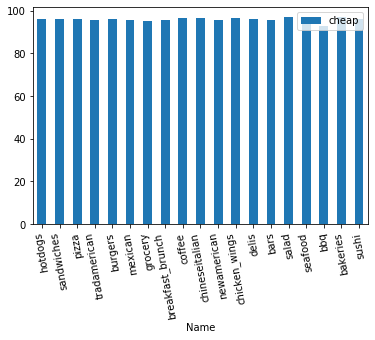

In [92]:
p1 = df_result.plot.bar(x='Name', y='cheap', rot=100)

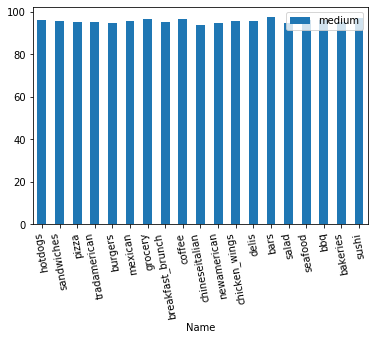

In [93]:
p2 = df_result.plot.bar(x='Name', y='medium', rot=100)

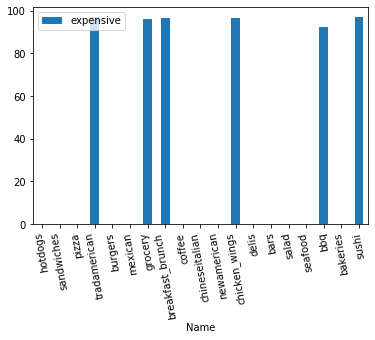

In [94]:
p3 = df_result.plot.bar(x='Name', y='expensive', rot=100)

# Ethics & Privacy

Since the data are given and they can all be get from the yelp website, the type of food sold by restaurant are not privacy.

The inspection score are also public, so there is no chance that the research will hurt someone's privacy.

# Conclusion & Discussion

As we can see from the bar chart, most of the inspection score from differnet type of restaurant are uniformly distributed. So, the type of food a restaurant sell don't have relationship with the inspection score.